# Set up

Create a regression problem

In [1]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
X, y = make_regression(n_samples=500)

Use a Random Forest to model the problem

In [3]:
model = RandomForestRegressor(oob_score=True, n_estimators=100)

In [4]:
model.fit(X, y)
model.oob_score_

0.61083857412884723

In [5]:
y_hat = model.oob_prediction_

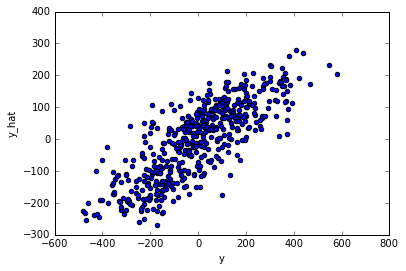

In [6]:
df = pd.DataFrame({
    'y': y,
    'y_hat': y_hat
})

df.plot('y', 'y_hat', kind='scatter')

# Use the Transformer to calibrate

In [7]:
from QuantileCalibrationTransformer import QuantileCalibrationTransformer

In [30]:
qct = QuantileCalibrationTransformer(quantile=100)

In [31]:
qct.fit(y_hat, y)

QuantileCalibrationTransformer(quantile=100)

In [32]:
df['yhat2'] = qct.transform(y_hat)

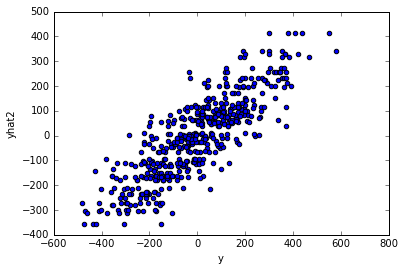

In [33]:
df.plot('y', 'yhat2', kind='scatter')

In [34]:
r2_score(y, qct.transform(y_hat))

0.71723943394642475

# Cross Validate

In [ ]:
from sklearn.model_selection import cross_validate